In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv("modelPerformance.csv")
df


,layer description,dropout,nodes,layers,parameters,epochs,training f1-score,validation f1-score,1-minute mean future return (bps),annualized mean future return,Notes
0,100,0.0,100,1,10101,1000,0.533,0.516,0.021,1.236,NaN
1,100x100,0.0,10000,2,20201,1000,0.542,0.520,0.023,1.390,NaN
2,500,0.0,500,1,50501,1000,0.547,0.518,0.021,1.166,NaN
3,100x100x100,0.0,1000000,3,30301,20,0.540,0.519,0.024,1.454,rapidly overfits without dropout
4,100x100x100,0.0,1000000,3,30301,115,0.544,0.521,0.026,1.642,"f1-score improved with further training, even ..."
5,100x100x100,0.5,1000000,3,30301,1000,0.539,0.524,0.025,1.582,NaN
6,500x500x500,0.0,125000000,3,551501,15,0.539,0.518,0.021,1.223,"rapidly overfits without dropout, early stoppi..."
7,32x32x32x32,0.5,1048576,4,6401,455,0.336,0.341,0.001,0.055,NaN


In [63]:
data = df[df['epochs'] == 1000]
data = data[data['dropout'] == 0]
data

,layer description,dropout,nodes,layers,parameters,epochs,training f1-score,validation f1-score,1-minute mean future return (bps),annualized mean future return,Notes
0,100,0.0,100,1,10101,1000,0.533,0.516,0.021,1.236,NaN
1,100x100,0.0,10000,2,20201,1000,0.542,0.520,0.023,1.390,NaN
2,500,0.0,500,1,50501,1000,0.547,0.518,0.021,1.166,NaN


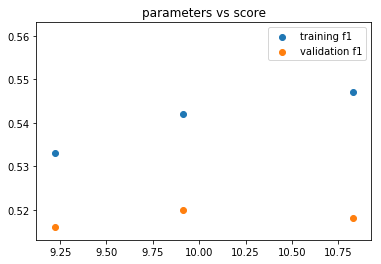

In [64]:
plt.scatter(np.log(data['parameters']), data['training f1-score'], label='training f1')
plt.scatter(np.log(data['parameters']), data['validation f1-score'], label='validation f1')
plt.legend()
plt.title('parameters vs score')
plt.show()

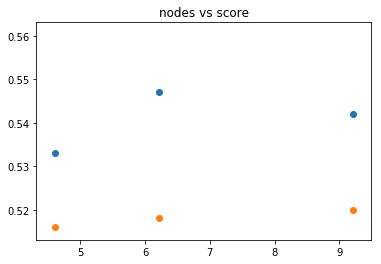

In [65]:
plt.scatter(np.log(data['nodes']), data['training f1-score'], label='training f1')
plt.scatter(np.log(data['nodes']), data['validation f1-score'], label='validation f1')
plt.title('nodes vs score')
plt.show()

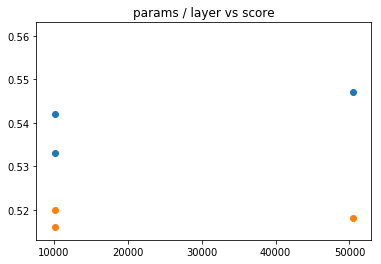

In [66]:
plt.scatter(data['parameters']/data['layers'],data['training f1-score'], label='training f1')
plt.scatter(data['parameters']/data['layers'], data['validation f1-score'], label='validation f1')
plt.title('params / layer vs score')
plt.show()

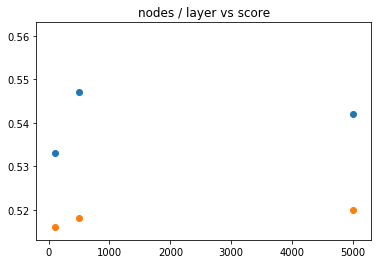

In [67]:
plt.scatter(data['nodes']/data['layers'],data['training f1-score'], label='training f1')
plt.scatter(data['nodes']/data['layers'], data['validation f1-score'], label='validation f1')
plt.title('nodes / layer vs score')
plt.show()